In [400]:
import scipy.stats as stats
import matplotlib
import matplotlib.patches as mpatches
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

*** Read the csv file ***

In [401]:
image_data =pd.read_csv("catalog for image resolution and size.csv")
image_data.head(10)

,file,size(BYTE),size(KB),size(MB),resolution(DPI)
0,Florence/20180915a_jpgs/jpgs/C25870216.jpg,8974386,8764.048828,8.558641,96
1,Florence/20180915a_jpgs/jpgs/C25870235.jpg,8151144,7960.101563,7.773537,96
2,Florence/20180915a_jpgs/jpgs/C25870324.jpg,8165571,7974.190430,7.787295,96
3,Florence/20180915a_jpgs/jpgs/C25870782.jpg,7886169,7701.336914,7.520837,96
4,Florence/20180915a_jpgs/jpgs/C25871060.jpg,7017676,6853.199219,6.692577,96
5,Florence/20180915a_jpgs/jpgs/C25871069.jpg,6086620,5943.964844,5.804653,96
6,Florence/20180915a_jpgs/jpgs/C25871159.jpg,11921486,11642.076170,11.369215,300
7,Florence/20180915a_jpgs/jpgs/C25871166.jpg,6389661,6239.903320,6.093656,96
8,Florence/20180915a_jpgs/jpgs/C25871524.jpg,7276103,7105.569336,6.939033,96
9,Florence/20180915a_jpgs/jpgs/C25871583.jpg,11616227,11343.971680,11.078097,300


*** Seperated the data based on the resolution. image_300 contains all the images with 300 resolution. image_96 contains all the images with 96 resolution. ***

In [402]:
image_300 = image_data.loc[image_data['resolution(DPI)'] == 300]
image_300.head()

,file,size(BYTE),size(KB),size(MB),resolution(DPI)
6,Florence/20180915a_jpgs/jpgs/C25871159.jpg,11921486,11642.076170,11.369215,300
9,Florence/20180915a_jpgs/jpgs/C25871583.jpg,11616227,11343.971680,11.078097,300
10,Florence/20180915a_jpgs/jpgs/C25871965.jpg,7816910,7633.701172,7.454786,300
16,Florence/20180915a_jpgs/jpgs/P25871949.jpg,13736437,13414.489260,13.100087,300
18,Florence/20180915a_jpgs/jpgs/P25873609.jpg,11051005,10791.997070,10.539060,300


In [403]:
image_96 = image_data.loc[image_data['resolution(DPI)'] == 96]
image_96.head()

,file,size(BYTE),size(KB),size(MB),resolution(DPI)
0,Florence/20180915a_jpgs/jpgs/C25870216.jpg,8974386,8764.048828,8.558641,96
1,Florence/20180915a_jpgs/jpgs/C25870235.jpg,8151144,7960.101563,7.773537,96
2,Florence/20180915a_jpgs/jpgs/C25870324.jpg,8165571,7974.190430,7.787295,96
3,Florence/20180915a_jpgs/jpgs/C25870782.jpg,7886169,7701.336914,7.520837,96
4,Florence/20180915a_jpgs/jpgs/C25871060.jpg,7017676,6853.199219,6.692577,96


*** Calculating the mean of image size between 300 and 96 resolution ***

In [404]:
image_300_size_mean = image_300["size(MB)"].mean()
print("300 resolution image size mean: " + str(image_300_size_mean))
image_96_size_mean = image_96["size(MB)"].mean()
print("96 resolution image size mean: " + str(image_96_size_mean))

300 resolution image size mean: 7.814360595040986
96 resolution image size mean: 7.126585937665785


*** Calculating the standard deviation of image size between 300 and 96 resolution ***

In [405]:
image_300_size_SD = image_300["size(MB)"].std()
print("300 resolution image size SD: " + str(image_300_size_SD))
image_96_size_SD = image_96["size(MB)"].std()
print("96 resolution image size SD: " + str(image_96_size_SD))

300 resolution image size SD: 2.6057085010465553
96 resolution image size SD: 2.0201401253159434


*** Calculating the image size mean, median, variance, and standard deviation ***

In [406]:
size_mean = image_data["size(MB)"].mean()
size_median = image_data["size(MB)"].median()
size_variance = image_data["size(MB)"].var()
size_SD = image_data["size(MB)"].std()
print("size mean: " + str(size_mean))
print("size median: " + str(size_median))
print("size variance: " + str(size_variance))
print("size SD: " + str(size_SD))

size mean: 7.29473926071142
size median: 6.865087508999999
size variance: 4.818473185178074
size SD: 2.1951020899215767


*** Calculating the image resolution mean, median, variance, and standard deviation ***

In [407]:
resolution_mean = image_data["resolution(DPI)"].mean()
resolution_median = image_data["resolution(DPI)"].median()
resolution_variance = image_data["resolution(DPI)"].var()
resolution_SD = image_data["resolution(DPI)"].std()
print("resolution mean: " + str(resolution_mean))
print("resolution median: " + str(resolution_median))
print("resolution variance: " + str(resolution_variance))
print("resolution SD: " + str(resolution_SD))

resolution mean: 145.875751503006
resolution median: 96.0
resolution variance: 7702.498587536447
resolution SD: 87.76387974295831


***Two sample T- test***

*** Null Hypothesis: Image size mean is same between 300 and 96 resolution Images. ***

*** Ploting the 300 resolution image size and 96 resolution image size together. Also ploting the mean as well to see the difference. ***

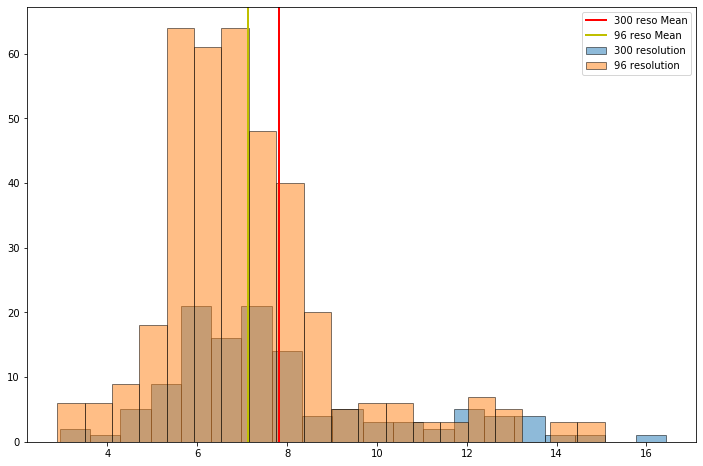

In [408]:
plt.figure(figsize=(12,8))

plt.hist(image_300["size(MB)"], bins=20, edgecolor='k', alpha=0.5, label='300 resolution')
plt.hist(image_96["size(MB)"], bins=20, edgecolor='k', alpha=0.5, label='96 resolution')

plt.axvline(image_300_size_mean, color='r', linewidth=2, label='300 reso Mean') 
plt.axvline(image_96_size_mean, color='y',  linewidth=2, label='96 reso Mean') 

plt.legend(loc='upper right')
plt.savefig('images_size_hyto_test.png', dpi = 100)

*** Calculating the T-Test within the data to find the P-value ***

In [409]:
stats.ttest_ind(a= image_300["size(MB)"],
                b= image_96["size(MB)"],
                equal_var=False)

Ttest_indResult(statistic=2.667511785040221, pvalue=0.008377859996939952)

*** The T-test gives p-value of 0.008 ***

*** Using 95% confidence level we reject the null hypothesis. Since the p-value is smaller than the corresponding significance level of 5%. ( 𝛼 < 0.05 ) ***

*** Ploting the histogram for image size ***

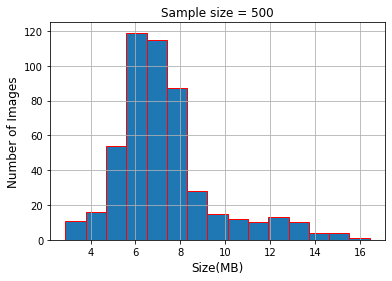

In [410]:
matplotlib.rc('axes', labelsize=12)
matplotlib.rc('axes', titlesize=12)
pd.DataFrame(ct).hist(column="size(MB)", bins=15, ec='red')
plt.xlabel("Size(MB)")
plt.ylabel( "Number of Images")
plt.title("Sample size = " + str(ct.shape[0]+1) + str())
plt.savefig('images_size_hist.png', dpi = 100)

*** Ploting the density curve for the image size using seaborn ***

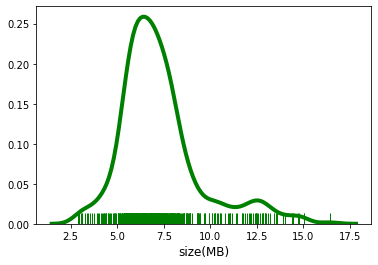

In [411]:
matplotlib.rc('axes', labelsize=12)
matplotlib.rc('axes', titlesize=12)
sns.distplot(ct['size(MB)'], hist=False, kde=True, rug=True,
             bins=15, color = 'green', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 4})
plt.savefig('images_size_density.png', dpi = 100)

*** Ploting the histogram for image resolution ***

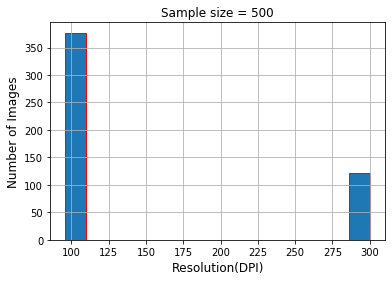

In [412]:
matplotlib.rc('axes', labelsize=12)
matplotlib.rc('axes', titlesize=12)
pd.DataFrame(image_data).hist(column="resolution(DPI)", bins=15, ec='red')
plt.xlabel("Resolution(DPI)")
plt.ylabel( "Number of Images")
plt.title("Sample size = " + str(ct.shape[0]+1) + str())
plt.savefig('images_reso_hist.png', dpi = 100)

*** Ploting the density curve for the image resolution using seaborn ***

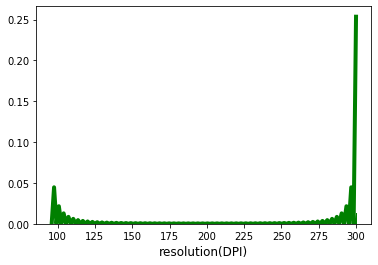

In [413]:
# seaborn histogram and density plot
matplotlib.rc('axes', labelsize=12)
matplotlib.rc('axes', titlesize=12)
sns.distplot(image_data['resolution(DPI)'], hist=False, kde=True, rug=True,
             bins=15, color = 'green', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 4})
plt.savefig('images_reso_density.png', dpi = 100)

*** Using the T-critical value to find the confidence interval for image size ***

In [414]:
sample_size = 500

for sample in range(25):
    sample = np.random.choice(a=image_data["size(MB)"], size = sample_size)
    sample_mean = sample.mean()
    
    t_critical = stats.t.ppf(q = 0.975, df=24)  # Get the t-critical value
    
    sigma = size_SD/math.sqrt(sample_size)  # Standard deviation estimate
    margin_of_error = t_critical * sigma
    
    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
print("T-critical value: " + str(t_critical))
print("Confidence interval for size: " + str(confidence_interval))

T-critical value: 2.0638985616280205
Confidence interval for size: (6.98797511084436, 7.39319249167564)


*** Used the T-critical value to fidn the confidence interval for resolution ***

In [415]:
sample_size = 500

for sample in range(25):
    sample = np.random.choice(a=image_data["resolution(DPI)"], size = sample_size)
    sample_mean = sample.mean()
    
    t_critical = stats.t.ppf(q = 0.975, df=24)  # Get the t-critical value
    
    sigma = resolution_SD/math.sqrt(sample_size)  # Standard deviation estimate
    margin_of_error = t_critical * sigma
    
    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
print("T-critical value: " + str(t_critical))
print("Confidence interval for resolution: " + str(confidence_interval))

T-critical value: 2.0638985616280205
Confidence interval for resolution: (147.05936321314707, 163.26063678685293)


*** Calculating the covariance and correlation between image size and resolution ***

In [416]:
print('Covariance of size and resolution: %.2f'%np.cov(ct["size(MB)"], ct["resolution(DPI)"])[0, 1])
print('Correlation of size and resolution: %.2f'%np.corrcoef(ct["size(MB)"], ct["resolution(DPI)"])[0, 1])

Covariance of size and resolution: 25.97
Correlation of size and resolution: 0.13


*** Ploting the image size and resolution to see the correlation between them ***

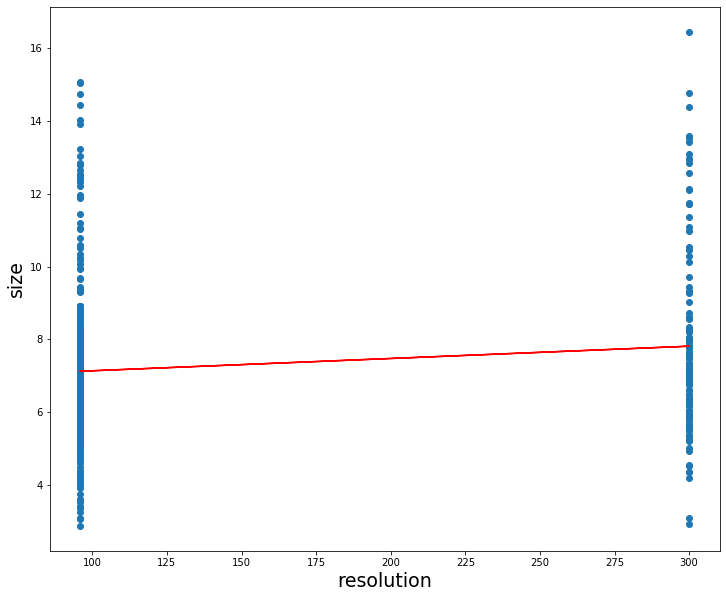

In [417]:
matplotlib.rc('axes', labelsize=19)
matplotlib.rc('axes', titlesize=12)
m, b = np.polyfit(image_data["resolution(DPI)"], image_data["size(MB)"], 1)
plt.figure(figsize=(12,10))
plt.scatter(image_data["resolution(DPI)"], image_data["size(MB)"])
plt.xlabel('resolution')
plt.ylabel('size')
plt.plot(image_data["resolution(DPI)"], m*image_data["resolution(DPI)"] + b, 'r-')
plt.savefig('images_correlation.png', dpi = 100)